# Hello Bank Customer Churn Prediction Binary Classifier

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Load Data

In [19]:
data_path = "data/Churn_Modelling.csv"

df = pd.read_csv(data_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check possible values in Geogrpahy and Gender

In [23]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [24]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [25]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Remove RowNumber, CustomerId and Surname columns from features.  Exited is the target/dependent variable.

In [54]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (10000, 10), y shape: (10000,)


### Feature Engineering

Label Encode Gender field

In [55]:
from sklearn.preprocessing import LabelEncoder

print(f" Before: {X[:,2]}")
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(f"AfterL {X[:, 2]}")

 Before: ['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']
AfterL [0 0 0 ... 0 1 0]


One-Hot Encode Geography

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

### Split Dataset

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")

X_train shape: (6000, 12), X_val shape: (2000, 12), X_test shape: (2000, 12)


### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")

X_train shape: (6000, 12), X_val shape: (2000, 12), X_test shape: (2000, 12)


### Build ANN (Artificial Neural Network)

In [59]:
ann_clf = tf.keras.models.Sequential()
ann_clf.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compile the ANN

In [60]:
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the ANN

In [61]:
history = ann_clf.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7454 - loss: 0.5816 - val_accuracy: 0.7950 - val_loss: 0.4798
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8008 - loss: 0.4802 - val_accuracy: 0.7950 - val_loss: 0.4550
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7962 - loss: 0.4547 - val_accuracy: 0.7960 - val_loss: 0.4360
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4399 - val_accuracy: 0.8135 - val_loss: 0.4242
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4229 - val_accuracy: 0.8240 - val_loss: 0.4159
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4201 - val_accuracy: 0.8240 - val_loss: 0.4086
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8162 - loss: 0.4065 - val_accuracy: 0.8225 - val_loss: 0.4022
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.3971 - val_accu

### Evaluate Model

In [62]:
test_loss, test_accuracy = ann_clf.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8537 - loss: 0.3546  
Test Loss: 0.3533022403717041, Test Accuracy: 0.8575000166893005


In [67]:
# Combine results into a DataFrame for better visualization
df_results = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Loss': [history.history['loss'][-1], history.history['val_loss'][-1], test_loss],
    'Accuracy': [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_accuracy]
})

print(df_results.to_string(index=False))

   Dataset     Loss  Accuracy
     Train 0.336897  0.864667
Validation 0.334054  0.860500
      Test 0.353302  0.857500


Plot Train and Validation Loss over Epochs

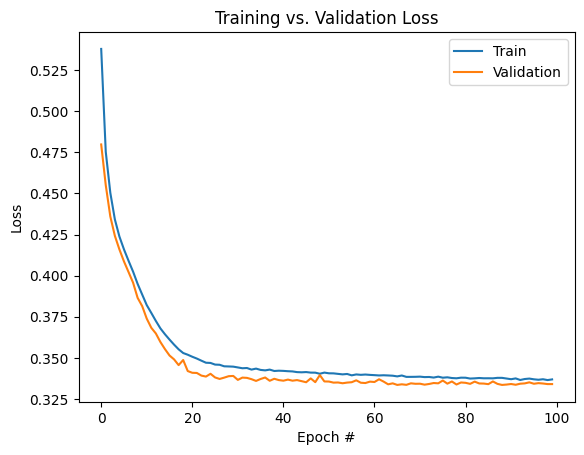

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()